In [ ]:
# Rule-Based Grapheme-to-Phoneme (G2P) Converter
# No external libraries required

def g2p_converter(word):
    word = word.lower()

    # Handle common word exceptions first
    exceptions = {
        "school": ['S', 'K', 'UW', 'L'],
        "phone": ['F', 'OW', 'N'],
        "knight": ['N', 'AY', 'T'],
        "laugh": ['L', 'AE', 'F'],
        "ghost": ['G', 'OW', 'S', 'T']
    }

    if word in exceptions:
        return exceptions[word]

    # Simplified phoneme mapping (ARPABET-inspired)
    phoneme_map = {
        'a': 'AE', 'e': 'EH', 'i': 'IH', 'o': 'OW', 'u': 'UH',
        'b': 'B', 'c': 'K', 'd': 'D', 'f': 'F', 'g': 'G',
        'h': 'HH', 'j': 'JH', 'k': 'K', 'l': 'L', 'm': 'M',
        'n': 'N', 'p': 'P', 'q': 'K', 'r': 'R', 's': 'S',
        't': 'T', 'v': 'V', 'w': 'W', 'x': 'K', 'y': 'Y', 'z': 'Z'
    }

    phonemes = []
    i = 0
    while i < len(word):
        char = word[i]

        # Rule 1: 'c' becomes 'S' before e, i, or y
        if char == 'c':
            if i + 1 < len(word) and word[i + 1] in ['e', 'i', 'y']:
                phonemes.append('S')
            else:
                phonemes.append('K')
            i += 1
            continue

        # Rule 2: handle double letters (e.g., 'tt' -> 'T')
        if i + 1 < len(word) and word[i + 1] == char:
            phoneme = phoneme_map.get(char, '')
            if phoneme:
                phonemes.append(phoneme)
            i += 2  # skip both
            continue

        # Rule 3: general phoneme mapping
        phoneme = phoneme_map.get(char, '')
        if phoneme:
            phonemes.append(phoneme)

        i += 1

    return phonemes

# -------------------------------
# Test the converter with samples
# -------------------------------

if __name__ == "__main__":
    test_words = ["cat", "city", "school", "phone", "book", "egg", "knight", "laugh", "ghost"]

    print("Grapheme-to-Phoneme Conversion (Rule-Based):\n")
    for word in test_words:
        phonemes = g2p_converter(word)
        print(f"{word:10} -> {phonemes}")

Grapheme-to-Phoneme Conversion (Rule-Based):

cat        -> ['K', 'AE', 'T']
city       -> ['S', 'IH', 'T', 'Y']
school     -> ['S', 'K', 'UW', 'L']
phone      -> ['F', 'OW', 'N']
book       -> ['B', 'OW', 'K']
egg        -> ['EH', 'G']
knight     -> ['N', 'AY', 'T']
laugh      -> ['L', 'AE', 'F']
ghost      -> ['G', 'OW', 'S', 'T']


In [ ]:
# Rule-Based Grapheme-to-Phoneme (G2P) Converter with Duration Modeling
# No external libraries required

def g2p_with_duration(word):
    word = word.lower()

    # Exception dictionary with predefined phonemes
    exceptions = {
        "school": ['S', 'K', 'UW', 'L'],
        "phone": ['F', 'OW', 'N'],
        "knight": ['N', 'AY', 'T'],
        "laugh": ['L', 'AE', 'F'],
        "ghost": ['G', 'OW', 'S', 'T']
    }

    # Phoneme types for duration modeling
    vowels = {'AE', 'EH', 'IH', 'OW', 'UH', 'AY', 'UW'}
    base_durations = {
        'vowel': 150,      # in milliseconds
        'consonant': 100,
        'final_bonus': 50
    }

    # Simplified ARPABET-inspired phoneme mapping
    phoneme_map = {
        'a': 'AE', 'e': 'EH', 'i': 'IH', 'o': 'OW', 'u': 'UH',
        'b': 'B', 'c': 'K', 'd': 'D', 'f': 'F', 'g': 'G',
        'h': 'HH', 'j': 'JH', 'k': 'K', 'l': 'L', 'm': 'M',
        'n': 'N', 'p': 'P', 'q': 'K', 'r': 'R', 's': 'S',
        't': 'T', 'v': 'V', 'w': 'W', 'x': 'K', 'y': 'Y', 'z': 'Z'
    }

    # Handle exceptions first
    if word in exceptions:
        phonemes = exceptions[word]
    else:
        phonemes = []
        i = 0
        while i < len(word):
            char = word[i]

            # Rule 1: 'c' → /s/ before 'e', 'i', or 'y'
            if char == 'c':
                if i + 1 < len(word) and word[i + 1] in ['e', 'i', 'y']:
                    phonemes.append('S')
                else:
                    phonemes.append('K')
                i += 1
                continue

            # Rule 2: double letters → single sound
            if i + 1 < len(word) and word[i + 1] == char:
                phoneme = phoneme_map.get(char, '')
                if phoneme:
                    phonemes.append(phoneme)
                i += 2
                continue

            # Rule 3: standard mapping
            phoneme = phoneme_map.get(char, '')
            if phoneme:
                phonemes.append(phoneme)

            i += 1

    # Assign durations to each phoneme
    durations = []
    for idx, phoneme in enumerate(phonemes):
        if phoneme in vowels:
            duration = base_durations['vowel']
        else:
            duration = base_durations['consonant']

        # Final phoneme gets a duration bonus
        if idx == len(phonemes) - 1:
            duration += base_durations['final_bonus']

        durations.append(duration)

    return phonemes, durations

# -----------------------------------
# Test words for G2P + Duration Model
# -----------------------------------

if __name__ == "__main__":
    test_words = ["cat", "city", "school", "phone", "book", "egg", "knight", "laugh", "ghost"]

    print("G2P + Duration Modeling Output:\n")
    for word in test_words:
        phonemes, durations = g2p_with_duration(word)
        print(f"{word:10} -> Phonemes: {phonemes} | Durations: {durations}")

G2P + Duration Modeling Output:

cat        -> Phonemes: ['K', 'AE', 'T'] | Durations: [100, 150, 150]
city       -> Phonemes: ['S', 'IH', 'T', 'Y'] | Durations: [100, 150, 100, 150]
school     -> Phonemes: ['S', 'K', 'UW', 'L'] | Durations: [100, 100, 150, 150]
phone      -> Phonemes: ['F', 'OW', 'N'] | Durations: [100, 150, 150]
book       -> Phonemes: ['B', 'OW', 'K'] | Durations: [100, 150, 150]
egg        -> Phonemes: ['EH', 'G'] | Durations: [150, 150]
knight     -> Phonemes: ['N', 'AY', 'T'] | Durations: [100, 150, 150]
laugh      -> Phonemes: ['L', 'AE', 'F'] | Durations: [100, 150, 150]
ghost      -> Phonemes: ['G', 'OW', 'S', 'T'] | Durations: [100, 150, 100, 150]


G2P + Prosodic Features Output:

cat        -> Phonemes: ['K', 'AE', 'T']
              Durations: [100, 150, 150]
              Pitches: [160.0, 220.00000000000003, 160.0]
              Stresses: [0.0, 1.0, 0.0]
              Loudnesses: [60, 70.0, 60]



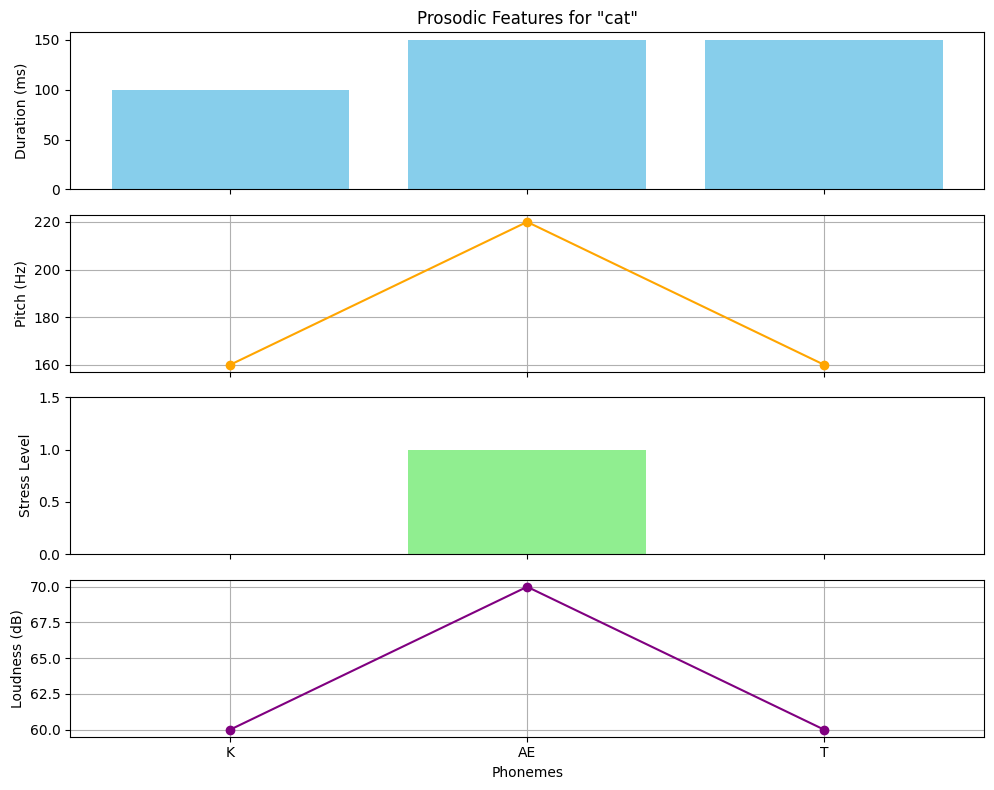

city       -> Phonemes: ['S', 'IH', 'T', 'Y']
              Durations: [100, 150, 100, 150]
              Pitches: [160.0, 220.00000000000003, 160.0, 160.0]
              Stresses: [0.0, 1.0, 0.0, 0.0]
              Loudnesses: [60, 70.0, 60, 60]



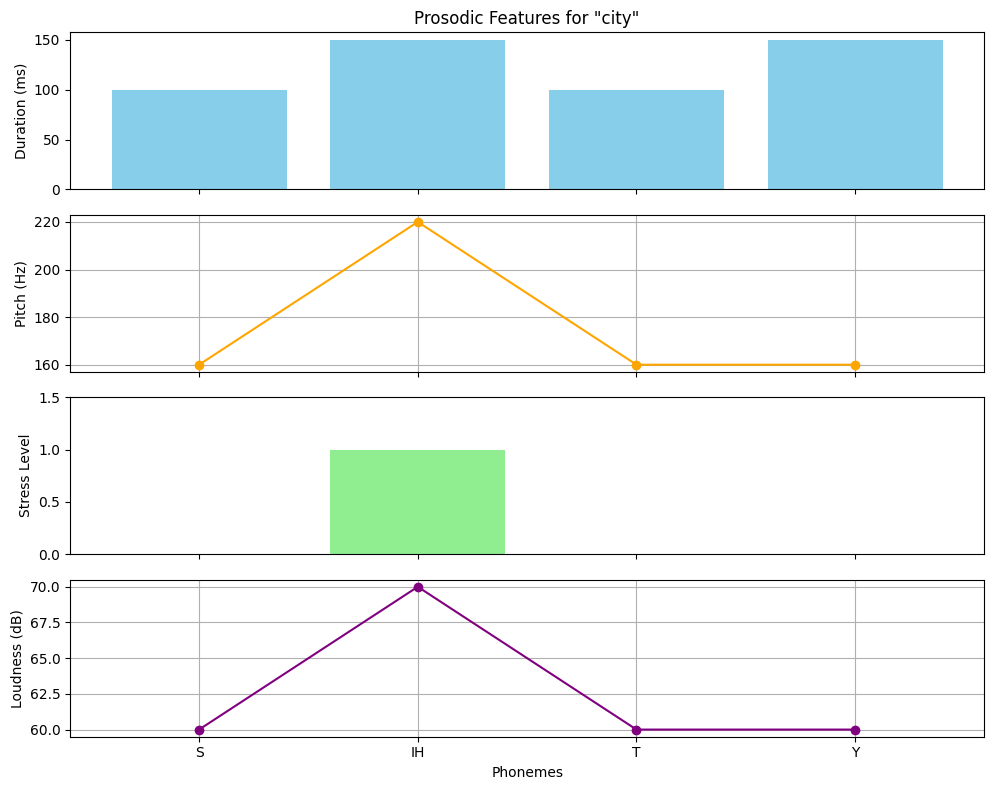

school     -> Phonemes: ['S', 'K', 'UW', 'L']
              Durations: [100, 100, 150, 150]
              Pitches: [160.0, 160.0, 220.00000000000003, 160.0]
              Stresses: [0.0, 0.0, 1.0, 0.0]
              Loudnesses: [60, 60, 70.0, 60]



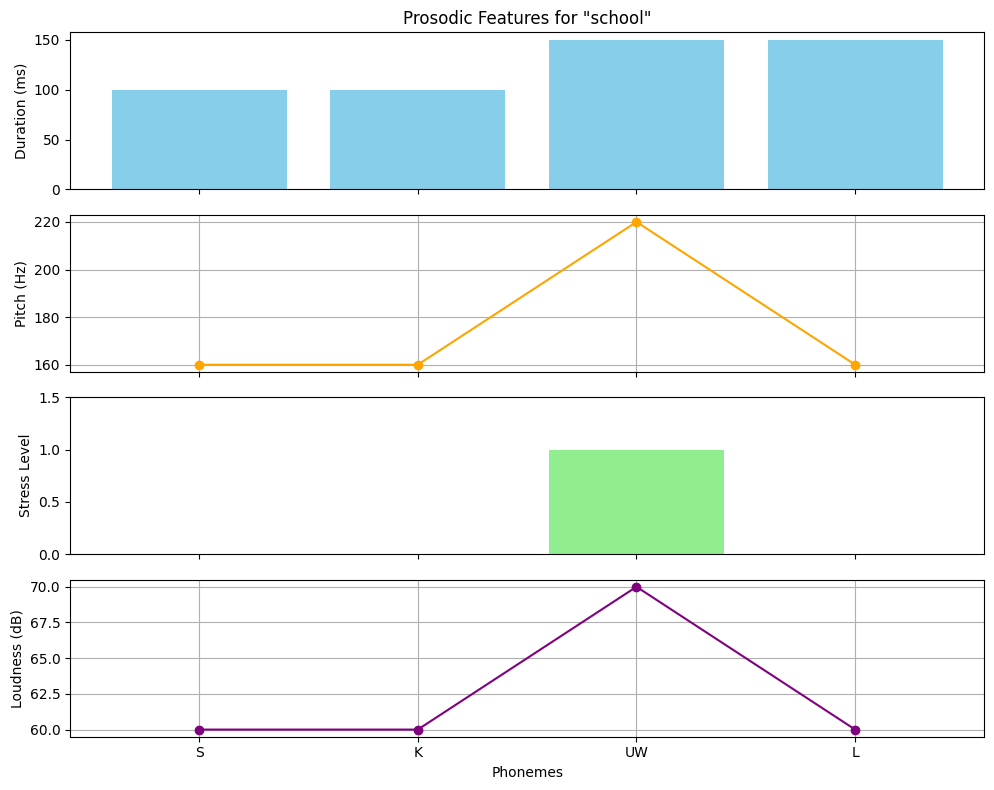

phone      -> Phonemes: ['F', 'OW', 'N']
              Durations: [100, 150, 150]
              Pitches: [160.0, 220.00000000000003, 160.0]
              Stresses: [0.0, 1.0, 0.0]
              Loudnesses: [60, 70.0, 60]



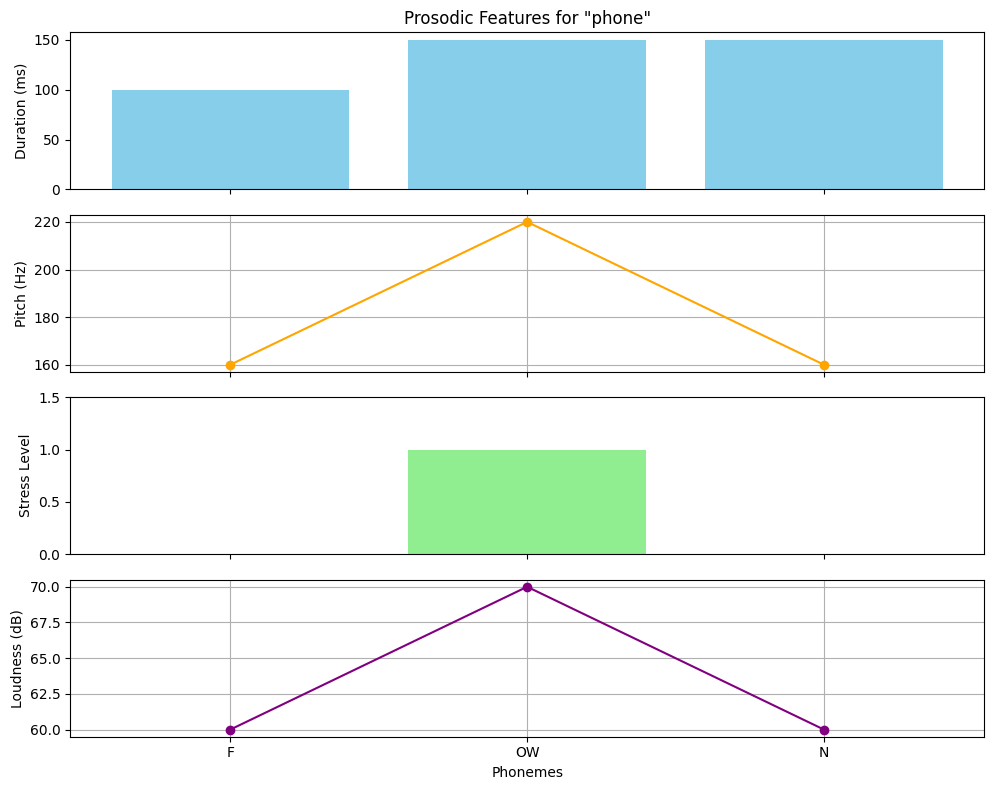

book       -> Phonemes: ['B', 'OW', 'K']
              Durations: [100, 150, 150]
              Pitches: [160.0, 220.00000000000003, 160.0]
              Stresses: [0.0, 1.0, 0.0]
              Loudnesses: [60, 70.0, 60]



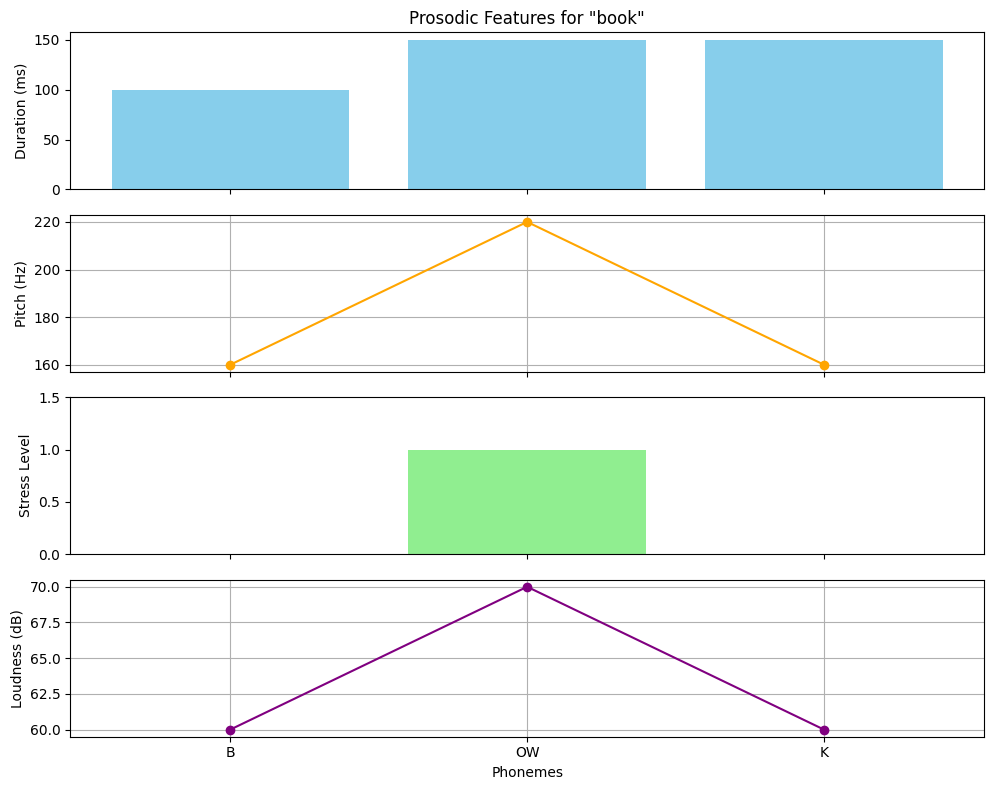

In [7]:
# Rule-Based Grapheme-to-Phoneme (G2P) Converter with Prosodic Features
# Requires matplotlib for visualization
# Modified for Google Colab compatibility

%matplotlib inline
import matplotlib.pyplot as plt

def g2p_with_prosody(word):
    word = word.lower()

    # Exception dictionary with predefined phonemes
    exceptions = {
        "school": ['S', 'K', 'UW', 'L'],
        "phone": ['F', 'OW', 'N'],
        "knight": ['N', 'AY', 'T'],
        "laugh": ['L', 'AE', 'F'],
        "ghost": ['G', 'OW', 'S', 'T']
    }

    # Phoneme types for prosodic modeling
    vowels = {'AE', 'EH', 'IH', 'OW', 'UH', 'AY', 'UW'}
    phoneme_map = {
        'a': 'AE', 'e': 'EH', 'i': 'IH', 'o': 'OW', 'u': 'UH',
        'b': 'B', 'c': 'K', 'd': 'D', 'f': 'F', 'g': 'G',
        'h': 'HH', 'j': 'JH', 'k': 'K', 'l': 'L', 'm': 'M',
        'n': 'N', 'p': 'P', 'q': 'K', 'r': 'R', 's': 'S',
        't': 'T', 'v': 'V', 'w': 'W', 'x': 'K', 'y': 'Y', 'z': 'Z'
    }

    # Handle exceptions first
    if word in exceptions:
        phonemes = exceptions[word]
    else:
        phonemes = []
        i = 0
        while i < len(word):
            char = word[i]

            # Rule 1: 'c' → /s/ before 'e', 'i', or 'y'
            if char == 'c':
                if i + 1 < len(word) and word[i + 1] in ['e', 'i', 'y']:
                    phonemes.append('S')
                else:
                    phonemes.append('K')
                i += 1
                continue

            # Rule 2: double letters → single sound
            if i + 1 < len(word) and word[i + 1] == char:
                phoneme = phoneme_map.get(char, '')
                if phoneme:
                    phonemes.append(phoneme)
                i += 2
                continue

            # Rule 3: standard mapping
            phoneme = phoneme_map.get(char, '')
            if phoneme:
                phonemes.append(phoneme)
            i += 1

    # Assign prosodic features
    durations, pitches, stresses, loudnesses = assign_prosodic_features(phonemes, vowels)

    return phonemes, durations, pitches, stresses, loudnesses

def assign_prosodic_features(phonemes, vowels):
    # Base prosodic parameters
    base_durations = {'vowel': 150, 'consonant': 100, 'final_bonus': 50}
    base_pitch = 200  # Hz, typical for neutral speech
    base_loudness = 60  # dB, typical for conversational speech

    durations = []
    pitches = []
    stresses = []
    loudnesses = []

    for idx, phoneme in enumerate(phonemes):
        # Duration
        if phoneme in vowels:
            duration = base_durations['vowel']
        else:
            duration = base_durations['consonant']
        if idx == len(phonemes) - 1:
            duration += base_durations['final_bonus']
        durations.append(duration)

        # Pitch: Vowels get slight pitch variation, consonants are neutral
        if phoneme in vowels:
            # Simple pitch contour: slight rise for first vowel, fall for last
            if idx == 0 or phonemes[idx-1] not in vowels:
                pitch = base_pitch * 1.1  # 10% rise for start of vowel
            elif idx == len(phonemes) - 1 or phonemes[idx+1] not in vowels:
                pitch = base_pitch * 0.9  # 10% fall for end of vowel
            else:
                pitch = base_pitch
        else:
            pitch = base_pitch * 0.8  # Lower pitch for consonants
        pitches.append(pitch)

        # Stress: Primary stress on first vowel, secondary on others
        if phoneme in vowels:
            if idx == 0 or phonemes[idx-1] not in vowels:
                stress = 1.0  # Primary stress
            else:
                stress = 0.5  # Secondary stress
        else:
            stress = 0.0  # No stress for consonants
        stresses.append(stress)

        # Loudness: Increase for stressed vowels
        loudness = base_loudness
        if stress > 0:
            loudness += 10 * stress  # Increase loudness for stressed vowels
        loudnesses.append(loudness)

    return durations, pitches, stresses, loudnesses

def visualize_prosodic_features(word, phonemes, durations, pitches, stresses, loudnesses):
    # Create a figure with subplots for each prosodic feature
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

    # X-axis: Phonemes
    x = range(len(phonemes))

    # Plot Duration
    ax1.bar(x, durations, color='skyblue')
    ax1.set_ylabel('Duration (ms)')
    ax1.set_title(f'Prosodic Features for "{word}"')

    # Plot Pitch
    ax2.plot(x, pitches, marker='o', color='orange')
    ax2.set_ylabel('Pitch (Hz)')
    ax2.grid(True)

    # Plot Stress
    ax3.bar(x, stresses, color='lightgreen')
    ax3.set_ylabel('Stress Level')
    ax3.set_ylim(0, 1.5)

    # Plot Loudness
    ax4.plot(x, loudnesses, marker='o', color='purple')
    ax4.set_ylabel('Loudness (dB)')
    ax4.set_xlabel('Phonemes')
    ax4.grid(True)

    # Set x-ticks to phonemes
    plt.xticks(x, phonemes)

    # Adjust layout
    plt.tight_layout()

    # Save the plot
    plt.savefig(f'prosody_{word}.png')

    # Display the plot in Colab
    plt.show()
    plt.close()

# -----------------------------------
# Test G2P with Prosodic Features
# -----------------------------------
if __name__ == "__main__":
    test_words = ["cat", "city", "school", "phone", "book"]

    print("G2P + Prosodic Features Output:\n")
    for word in test_words:
        phonemes, durations, pitches, stresses, loudnesses = g2p_with_prosody(word)
        print(f"{word:10} -> Phonemes: {phonemes}")
        print(f"{'':10}    Durations: {durations}")
        print(f"{'':10}    Pitches: {pitches}")
        print(f"{'':10}    Stresses: {stresses}")
        print(f"{'':10}    Loudnesses: {loudnesses}\n")
        visualize_prosodic_features(word, phonemes, durations, pitches, stresses, loudnesses)


Custom Word Testing:

Enter a word to test: Yeah

Yeah       -> Phonemes: ['Y', 'EH', 'AE', 'HH']
              Durations: [100, 150, 150, 150]
              Pitches: [160.0, 220.00000000000003, 180.0, 160.0]
              Stresses: [0.0, 1.0, 0.5, 0.0]
              Loudnesses: [60, 70.0, 65.0, 60]



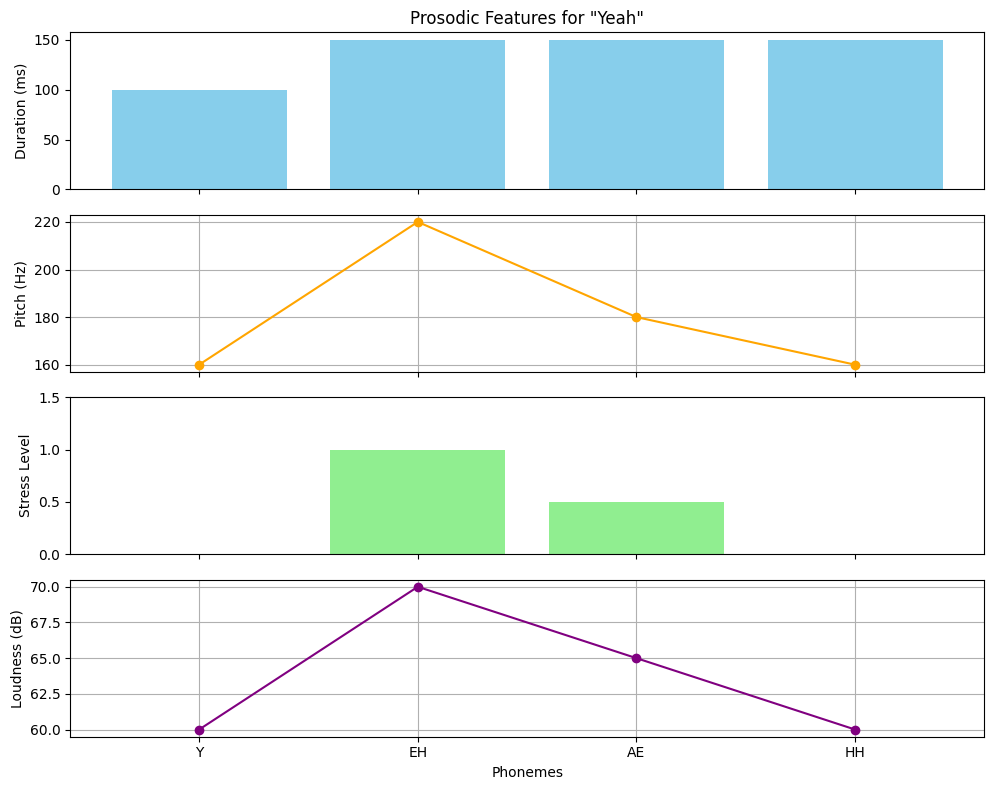

In [8]:
# Test a Custom Word (Separate Colab Cell)
# -----------------------------------
print("\nCustom Word Testing:\n")
test_word = input("Enter a word to test: ").strip()
if test_word:
    phonemes, durations, pitches, stresses, loudnesses = g2p_with_prosody(test_word)
    print(f"\n{test_word:10} -> Phonemes: {phonemes}")
    print(f"{'':10}    Durations: {durations}")
    print(f"{'':10}    Pitches: {pitches}")
    print(f"{'':10}    Stresses: {stresses}")
    print(f"{'':10}    Loudnesses: {loudnesses}\n")
    visualize_prosodic_features(test_word, phonemes, durations, pitches, stresses, loudnesses)
else:
    print("No word provided.")